In [321]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [338]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [323]:
import pandas as pd
import numpy as np

In [324]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

# Explore Database

In [325]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Reflect and query dates

In [326]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [327]:
session = Session(engine)

### How many dates do we have ?

In [328]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(18103)]

What is the earliest date?

In [329]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [330]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

# Precipitation Analysis

In [331]:
import datetime as dt

In [332]:
# Query for the precipitation data for the last 12 months using the datetime library
latest_date = dt.date(2017, 8, 23)
query_date = latest_date - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [333]:
#query results to retrieve the last 12 months of precipitation data.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).filter(Measurement.date <= latest_date).all()
results[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [334]:
# Load the query results for `months` and `Precipitation` into pandas
# and set the index to `months`

### BEGIN SOLUTION
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df.head()
### END SOLUTION

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


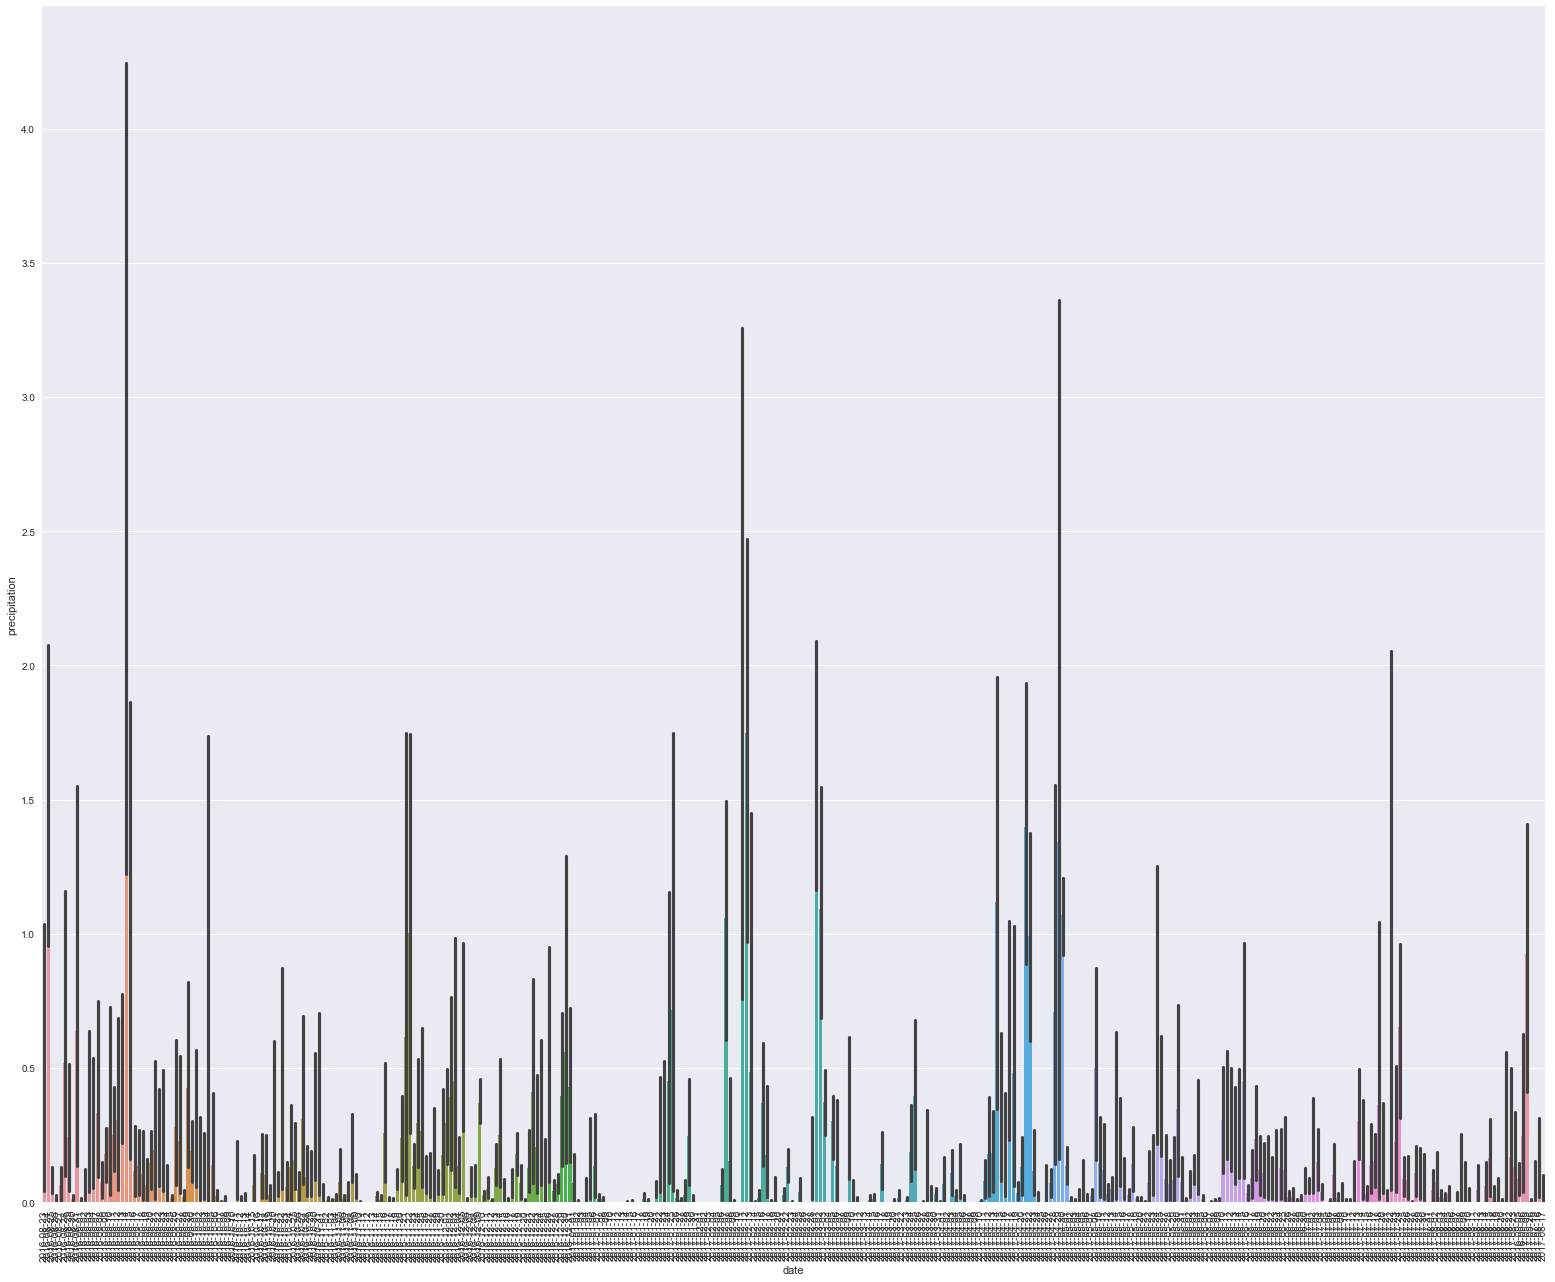

In [343]:
#Create a bar plot using pandas plotting
import seaborn as sns
sns_major = sns.barplot(x=df.index, data=df, y='precipitation')
sns_major.set_xticklabels(sns_major.get_xticklabels(),rotation=90)
sns.set(rc={'figure.figsize':(24,22)})
plt.savefig('Precipitation.png')
plt.show()

In [139]:
#summary statistics for the precipitation data.
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [154]:
# Total stations
session.query(func.count(Station.station).distinct()).all()

[(9)]

In [159]:
#Find the Most active stations
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()


[('USC00511918', 1932),
 ('USC00513117', 2696),
 ('USC00514830', 1937),
 ('USC00516128', 2484),
 ('USC00517948', 683),
 ('USC00518838', 342),
 ('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00519523', 2572)]

In [182]:
#Station with highest number of observations
station_highest= session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station)).all()[-1][0]
station_highest

'USC00519281'

In [183]:
#query to retrieve the last 12 months of temperature observation data (tobs).
results_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date >= query_date).\
filter(Measurement.date <= latest_date).filter(Measurement.station == station_highest).all()
results_temp[:5]


[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0)]

In [187]:
# Load the query results for `months` and `sightings` into pandas
# and set the index to `months`

### BEGIN SOLUTION
df = pd.DataFrame(results_temp, columns=['station','date', 'tobs'])
df.set_index('date', inplace=True)
df.head()
### END SOLUTION

,station,tobs
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


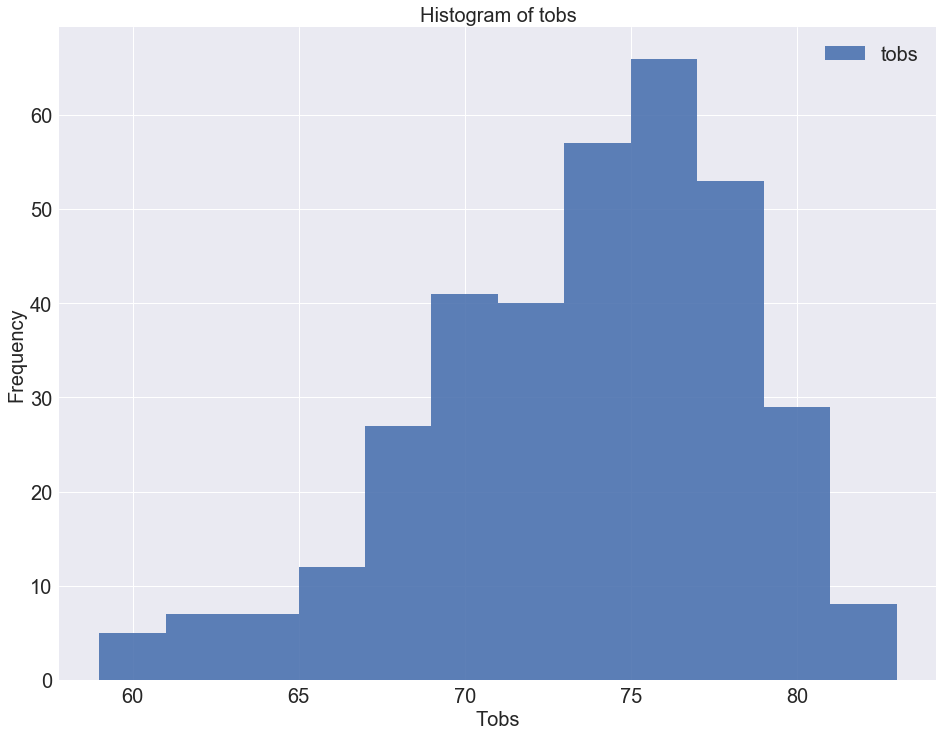

In [218]:
#Plot the results as a histogram with bins=12.
df.plot.hist(by="tobs", bins=12, alpha=0.9, figsize=(14,12))
plt.xlabel('Tobs', size = 20)
plt.ylabel('Frequency', size = 20)
plt.title('Histogram of tobs', size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(prop={'size':20})
plt.show()

# Temperature Analysis

Minimum temperature:58 Average temperature:74 Maximum temperature:87


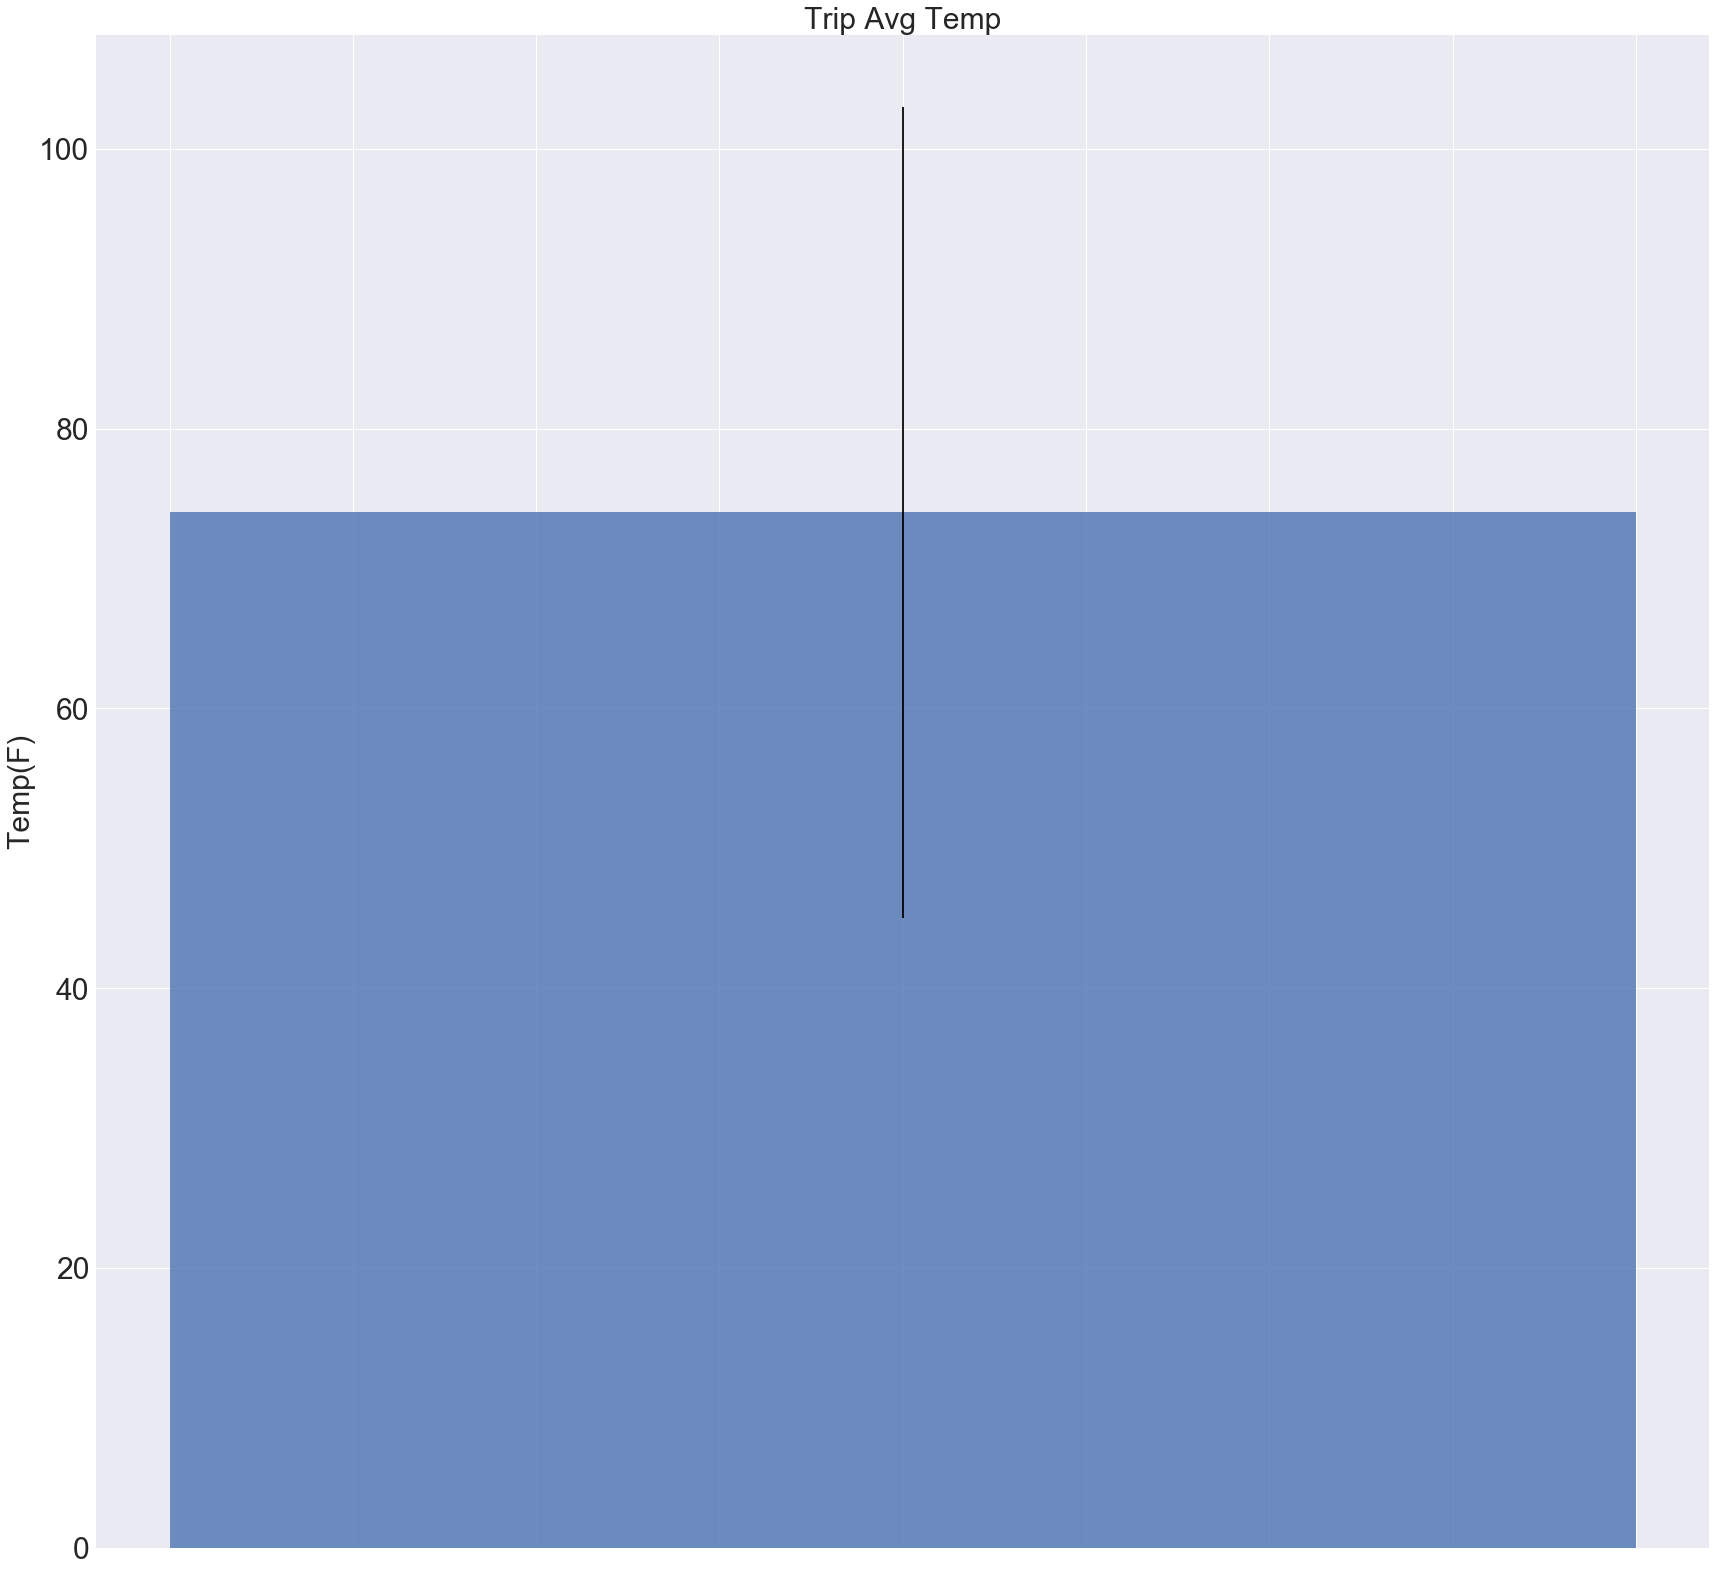

(58, 74, 87)

In [319]:
def calc_temps(start_date, end_date):
    #print (start_date, end_date)
    #query to retrieve the temperature observation data (tobs).
    results_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).all()
    df = pd.DataFrame(results_temp, columns=['date', 'temp(F)'])
    df.set_index('date', inplace=True)
    min_temp = int(round(df["temp(F)"].min()))
    avg_temp = int(round(df["temp(F)"].mean()))
    max_temp = int(round(df["temp(F)"].max()))
    print (f"Minimum temperature:{min_temp} Average temperature:{avg_temp} Maximum temperature:{max_temp}")
    plt.bar(x=0, height=avg_temp, yerr=max_temp-min_temp, linewidth=1, align='center', alpha=0.8, ecolor='black')
    plt.ylabel('Temp(F)', size = 30)
    plt.title('Trip Avg Temp', size = 30)
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.yticks(size = 30)
    plt.tight_layout()
    plt.show()
    return min_temp, avg_temp, max_temp

calc_temps('2017-01-01', '2018-01-01')
    